In [ ]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
from model import MLP
from torch import nn
from dataloader import load_data
from tqdm import tqdm


train_inputs,train_lables,test_inputs,test_lables=load_data(60000,60000,device=torch.device('cuda:5'))




load data set
create loader
construct data


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


epoch0 loss:2.7234010696411133
epoch0 acc:0.8968
epoch1 loss:2.588578224182129
epoch1 acc:0.1485
epoch2 loss:2.511601448059082
epoch2 acc:0.1567
epoch3 loss:2.459994316101074
epoch3 acc:0.1634
epoch4 loss:2.421658754348755
epoch4 acc:0.1675
epoch5 loss:2.3914835453033447
epoch5 acc:0.171
epoch6 loss:2.3666863441467285
epoch6 acc:0.1746
epoch7 loss:2.34555983543396
epoch7 acc:0.178
epoch8 loss:2.3271632194519043
epoch8 acc:0.1821
epoch9 loss:2.310814619064331
epoch9 acc:0.1857
epoch10 loss:2.2960309982299805
epoch10 acc:0.1885
epoch11 loss:2.28244948387146
epoch11 acc:0.1924
epoch12 loss:2.2698616981506348
epoch12 acc:0.1955
epoch13 loss:2.2580296993255615
epoch13 acc:0.1993
epoch14 loss:2.2468369007110596
epoch14 acc:0.2033
epoch15 loss:2.236180543899536
epoch15 acc:0.2079
epoch16 loss:2.2259578704833984
epoch16 acc:0.2109
epoch17 loss:2.216116428375244
epoch17 acc:0.2125
epoch18 loss:2.2065770626068115
epoch18 acc:0.2166
epoch19 loss:2.1972830295562744
epoch19 acc:0.2198
epoch20 loss:

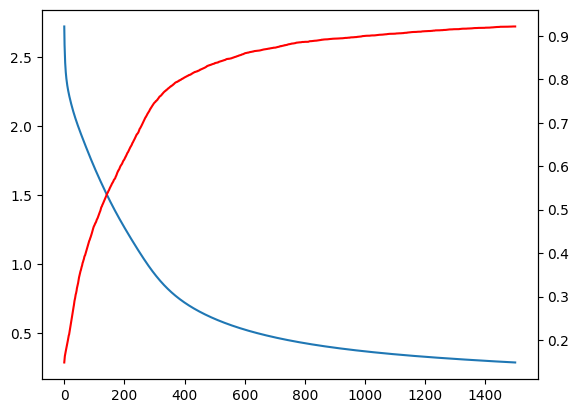

In [28]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1.5e-3,
    epoch         = 1500,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total

mlp = MLP()
mlp.train()

device = torch.device('cuda:5')
mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    print(f"epoch{epoch} acc:{acci}")
    acci=acc(mlp)
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()
torch.save(mlp,'./mlp.pth')